# Spindle Cutting Tests

## Object
- Play around with Dremel High Speed Cutter 115 in the ER11 spindle

# Code:

In [21]:
import numpy as np

import GCode
import GRBL
from utils import picture

cnc = GRBL.GRBL(port="/dev/cnc_3018")

In [22]:
print("Laser Mode: {}".format(cnc.laser_mode))

Laser Mode: 0.0


In [23]:
def init(feed = 200):
    program = GCode.GCode()
    program.G21() # Metric Units
    program.G91() # Absolute positioning.
    program.G1(F=feed) 
    return program

def end():
    program = GCode.GCode()
    return program

## Test Setup

In [24]:
cnc.cmd("$X")

['ok', 'ok']

In [25]:
def jogx(x=10):
    program = GCode.GCode()
    program.G0(X=x)
    cnc.run(program)
def jogy(y=10):
    program = GCode.GCode()
    program.G0(Y=y)
    cnc.run(program)
def jogz(z=10):
    program = GCode.GCode()
    program.G0(Z=z)
    cnc.run(program)

# Test Setup

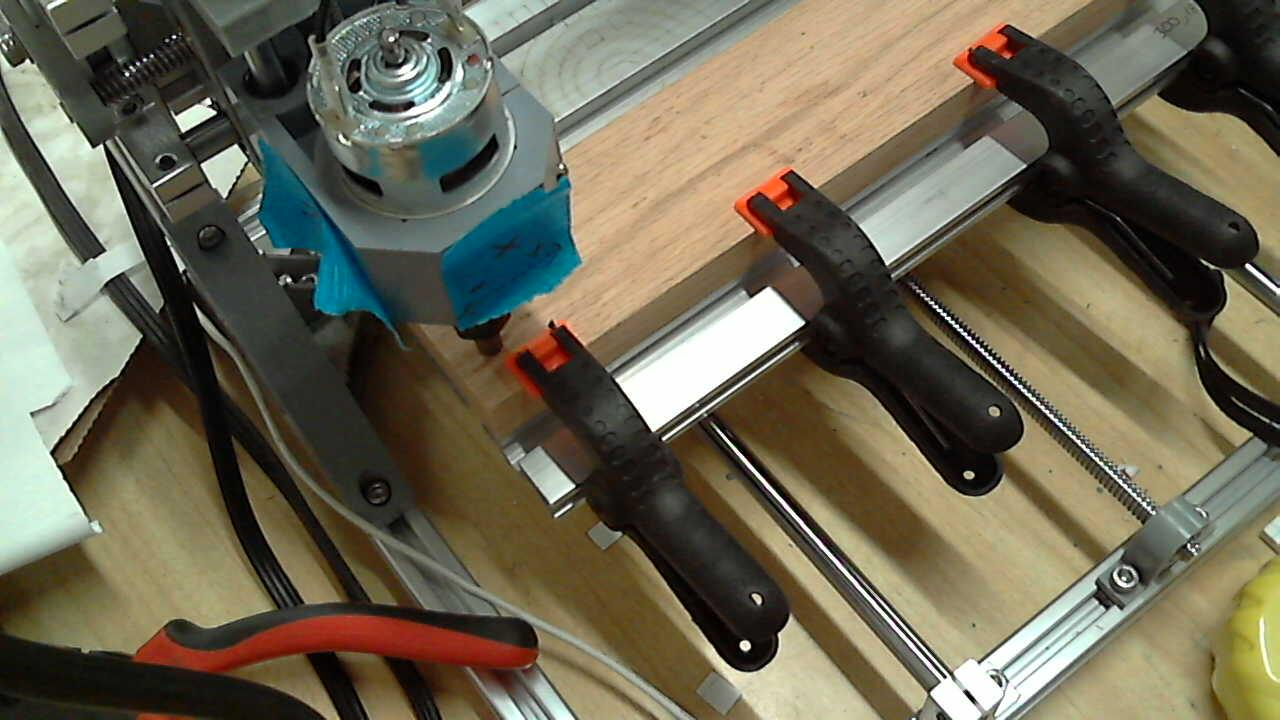

In [8]:
picture()

# Test Setup

- Oak Board 63mm x 300mm x 19mm
- Dremel High Speed Cutter "Carving / Engraving" 115.
- 28.8V . Coarse cranked up. Fine Knob in middle.

In [44]:
def test_program(feed=200):
    prog = GCode.GCode()
    prog.G0(Z=-2)
    dZ = -1
    dX = 20
    X = 0
    Z = 0
    for loops in range(10):
        prog.M3(S=10000)
        prog.G1(Z=dZ, F=10)
        prog.G1(X=dX, F=feed)
        X+=dX
        Z+=dZ
    prog.M3(S=0)
    prog.G0(Z=-Z)
    prog.G0(X=-X)
    prog.G0(Z=2)
    return prog

In [45]:
test_program()

<GCode>[cmds=35]

In [19]:
from IPython.core.magic import register_cell_magic


@register_cell_magic
def CNC(_, cell):
    commands = cell.splitlines()
    cnc.run(commands)
    return None

In [27]:
%%CNC
G1 F100
G1 Y+10

In [46]:
# This test is going to immediately run out of Y axis. To test Ctrl-C and interrupting tests.
test_run = GCode.GCode()
# Lower head to touching part.
# Then lift by 2.
test_run.G0(Z=2)
for XFeed in [100, 250, 500]:
    test_run += test_program(feed=XFeed)

In [47]:
test_run

<GCode>[cmds=106]

In [48]:
gcode_file = "SpindleTests.gcode"

In [49]:
test_run.save(gcode_file)

del test_run
test_run = GCode.GCode()

test_run.load(gcode_file)

In [50]:
test_run.buffer[0:5]

['G0 Z2', 'G0 Z-2', 'M3 S10000', 'G1 Z-1 F10', 'G1 X20 F100']

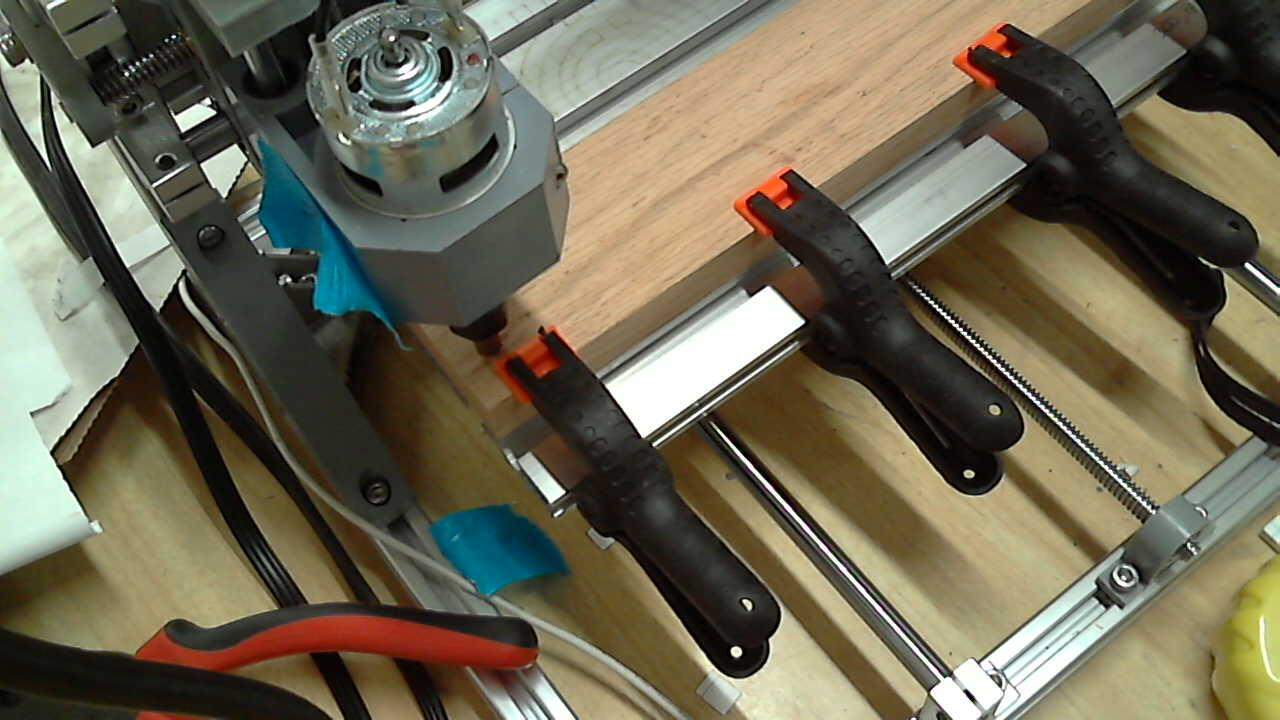

In [51]:
picture()

In [52]:
while 1:
    try:
        cnc.run(test_run)
        while 1:
            print(cnc.status)
            sleep(5)
    except KeyboardInterrupt as error:
        print("Feed Hold")
        cnc.cmd("!")
        print("^C")
        break
    except:
        raise

^C


AssertionError: 

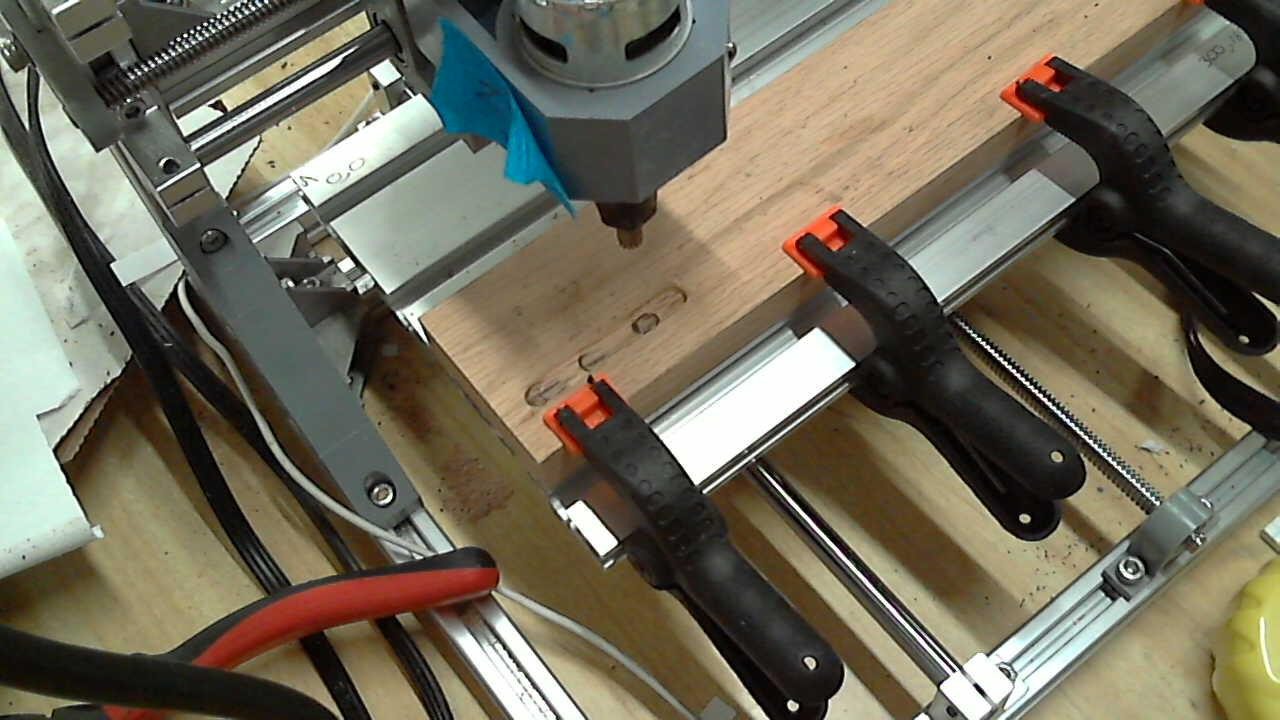

In [53]:
picture()

# Test Aborted.

Cuts were way too aggressive.